## 3-layers MLP(Feedforward NN) : MNIST - Keras

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils

import matplotlib.pyplot as plt

### Step 1. Data -  target class : 10

In [2]:
num_classes = 10

# Step 1. Data Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### target : one-hot encoding

In [4]:
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

### Step 2. FFNN Model (3-layer NN : input = 784, hidden1,2 = 256, output = 10 with softmax)

In [5]:
# Step 2. Model
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


### Step 3. Loss,Optimizer, Metric

In [6]:
# Step 3. Loss,Optimizer, Metric
model.compile (optimizer= 'rmsprop', 
                loss='categorical_crossentropy', metrics = ['accuracy'])

### Step 4. Train the model

In [7]:
# Step 4. Train the model
history=model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=2,
                  validation_split=0.2)

Epoch 1/15
480/480 - 3s - loss: 0.2675 - accuracy: 0.9204 - val_loss: 0.1395 - val_accuracy: 0.9582
Epoch 2/15
480/480 - 2s - loss: 0.1035 - accuracy: 0.9688 - val_loss: 0.1015 - val_accuracy: 0.9699
Epoch 3/15
480/480 - 2s - loss: 0.0685 - accuracy: 0.9793 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 4/15
480/480 - 2s - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 5/15
480/480 - 2s - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.1029 - val_accuracy: 0.9737
Epoch 6/15
480/480 - 2s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0951 - val_accuracy: 0.9768
Epoch 7/15
480/480 - 2s - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.1126 - val_accuracy: 0.9756
Epoch 8/15
480/480 - 2s - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.1156 - val_accuracy: 0.9772
Epoch 9/15
480/480 - 2s - loss: 0.0137 - accuracy: 0.9951 - val_loss: 0.1402 - val_accuracy: 0.9739
Epoch 10/15
480/480 - 2s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.1243 - val_accuracy: 0.9786

In [8]:
### Step 5. Test the Model

In [9]:
# Step 5. Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss = ', test_loss, 'test_acc = ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1371 - accuracy: 0.9796
test_loss =  0.13712799549102783 test_acc =  0.9796000123023987


### Plot the Training/Validation loss

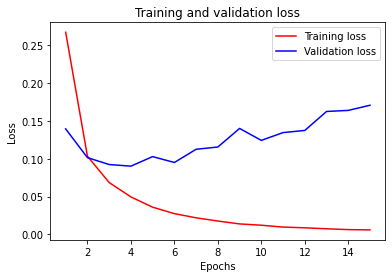

In [10]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'r', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Validation Accuracy

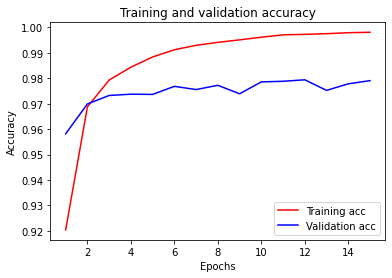

In [11]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()